<a href="https://colab.research.google.com/github/VIHAN-droid/AI-ML-PROJECT/blob/main/SUPERVISED%20LEARNING/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR DATA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

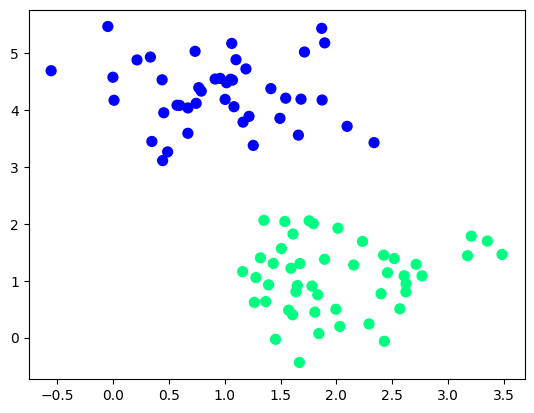

In [ ]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='winter')

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

<Axes: >

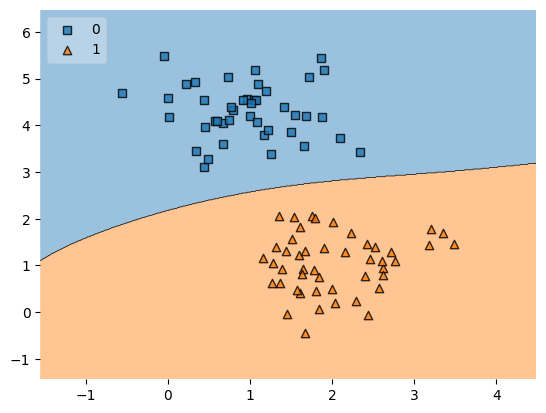

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=x_train, y=y_train, clf=svm, legend=2)

# NON LINEAR DATA

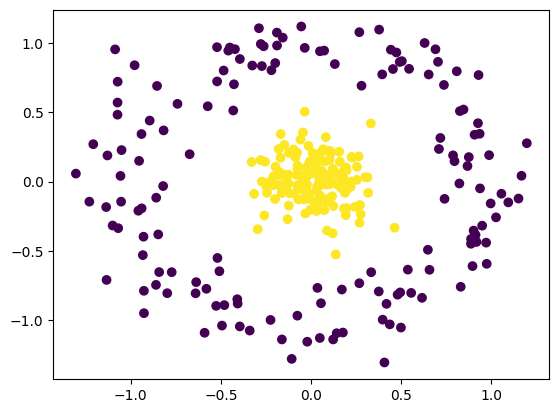

In [76]:
from sklearn.datasets import make_circles
x,y = make_circles(n_samples=300,factor=0.1,noise=0.15,random_state=6)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)
plt.scatter(x[:,0],x[:,1],c=y)

In [77]:
svm2 = SVC()
svm2.fit(x_train,y_train)
y_pred = svm2.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [78]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

1.0

<Axes: >

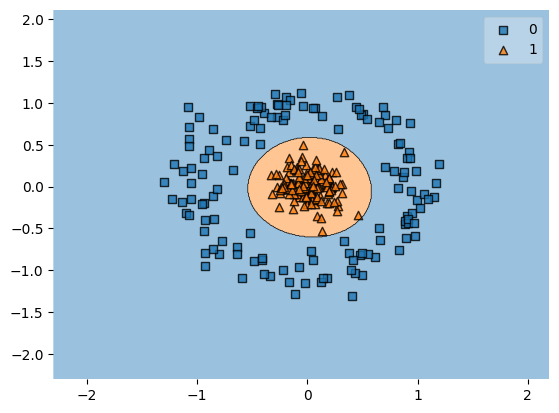

In [ ]:
plot_decision_regions(x_train,y_train,clf=svm2)

In [ ]:
# Hyperparameter -> kernel's default value is rbf that can handle linear,poly,non-linear,etc types of data.
# if u specifically want to use linear classification then do -> kernel = "linear"

## SVM REGRESSION

In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score
x,y = fetch_california_housing(return_X_y=True,as_frame=True)
x = x.iloc[:,0]

In [43]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


(0.0, 10.0)

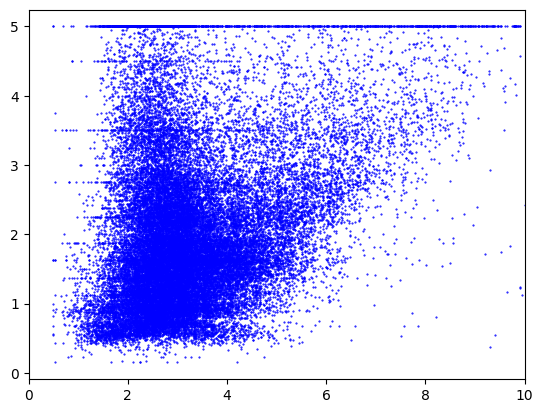

In [49]:
plt.plot(x_train,y_train,"ob",markersize=0.5)
plt.xlim(0,10)

In [50]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=3)

In [53]:
from sklearn.svm import SVR
svm_reg = SVR()
svm_reg.fit(x_train.values.reshape(-1,1),y_train.values)

SVR()

In [56]:
y_pred = svm_reg.predict(x_test.values.reshape(-1,1))
r2_score(y_test,y_pred)

0.49236850856439596

In [66]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_split=50)
dtr.fit(x_train.values.reshape(-1,1),y_train.values)
y_pred2 = dtr.predict(x_test.values.reshape(-1,1))
r2_score(y_test,y_pred2)

0.41469150379065656

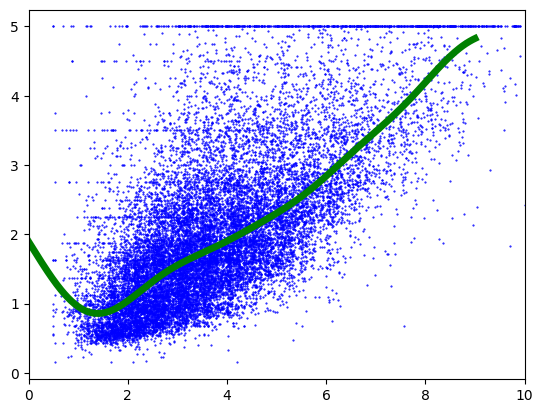

In [71]:
plt.plot(x_train,y_train,"ob",markersize=0.5)
plt.xlim(0,10)
x_plot = np.linspace(0,9,400).reshape(-1,1)
y_plot_svm = svm_reg.predict(x_plot)
y_plot_dt = dtr.predict(x_plot)
plt.plot(x_plot,y_plot_svm,label="svm",color="green",linewidth=5)

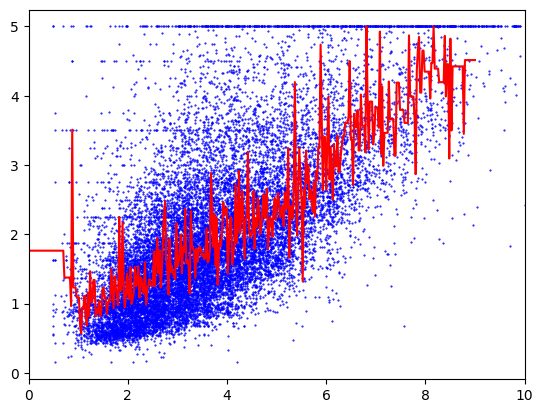

In [73]:
plt.plot(x_train,y_train,"ob",markersize=0.5)
plt.xlim(0,10)
plt.plot(x_plot,y_plot_dt,label="dt",color="red")